# <div style="text-align: center; font-weight: bold; color: #FFD700; font-size: 24px;">RELACIÓN ENTRE LAS HORAS DE SOL Y LA FELICIDAD</div>



## Hipótesis
Se ha observado que la cantidad de luz solar que una región recibe puede influir en el estado de ánimo de sus habitantes. Esto lleva a la pregunta: ¿Existe una correlación significativa entre las horas promedio de sol que un país recibe y la felicidad percibida por sus ciudadanos? Esta investigación busca explorar la relación entre estas dos variables utilizando datos globales.

## Objetivo
El objetivo de este breve análisis de datos, intentaremos averiguar si hay una correlación positiva entre las horas de sol anuales y la puntuación de felicidad de los países, según el World Happiness Report. Esto se hará a principalmente mediante la visualización de datos y algún cálculo estadístico (como la correlación de pearson)

## Metodología
Utilizaremos dos conjuntos de datos: uno que detalla las horas de sol anuales por país y otro que proporciona la puntuación de felicidad de cada país. Después de limpiar y combinar los datos, emplearemos métodos de correlación  para evaluar la relación entre estas dos medidas.


Imports básicos (Setup)

In [22]:
#IMPORTS BÁSICOS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# Carga de los datasets (link a archivos)
sunshine_data = pd.read_csv('sunshine_data.csv')
happiness_index = pd.read_csv('happiness_index.csv')


Comprobación preeliminar de los datos:

In [41]:
#Comprobación de los datasets
print(sunshine_data.head())
print(happiness_index.head())


       Country     City    Jan    Feb    Mar    Apr    May    Jun    Jul  \
0  Ivory Coast   Gagnoa  183.0  180.0  196.0  188.0  181.0  118.0   97.0   
1  Ivory Coast   Bouaké  242.0  224.0  219.0  194.0  208.0  145.0  104.0   
2  Ivory Coast  Abidjan  223.0  223.0  239.0  214.0  205.0  128.0  137.0   
3  Ivory Coast  Odienné  242.0  220.2  217.3  214.7  248.8  221.8  183.5   
4  Ivory Coast    Ferké  279.0  249.0  253.0  229.0  251.0  221.0  183.0   

     Aug    Sep    Oct    Nov    Dec    Year  
0   80.0  110.0  155.0  171.0  164.0  1823.0  
1   82.0  115.0  170.0  191.0  198.0  2092.0  
2  125.0  139.0  215.0  224.0  224.0  2296.0  
3  174.5  185.4  235.8  252.0  242.6  2638.6  
4  151.0  173.0  245.0  261.0  262.0  2757.0  
  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Net

Una vez hemos realizado los import necesarios y verificado la integridad de los DataSets, procedemos a realizar algunos ajustes en las columnas para facilitar el cruce de datos.

1. En primer lugar, identificamos las columnas clave en ambos DataSets que nos permitirán unir la información de manera efectiva. Por ejemplo, podemos considerar el uso de un código de país o región común como clave de unión.

2. Luego, realizamos la limpieza y preprocesamiento de los datos si es necesario. Esto puede incluir la eliminación de valores nulos o duplicados, la estandarización de nombres de columnas y la conversión de tipos de datos.

3. A continuación, unimos los DataSets utilizando las claves identificadas anteriormente. Esto nos permitirá tener un único conjunto de datos enriquecido con información relevante de ambas fuentes.


In [26]:
# Renombramos algúnas columnas para que coincidan (ajustes de estructuración)
sunshine_data.rename(columns={'Country': 'Country name'}, inplace=True)

# Convertir todos los nombres de países a un formato uniforme, como todos en mayúsculas
sunshine_data['Country name'] = sunshine_data['Country name'].str.upper()
happiness_index['Country name'] = happiness_index['Country name'].str.upper()


In [27]:
combined_data = pd.merge(sunshine_data, happiness_index, on='Country name', how='inner')


In [28]:
print(combined_data.describe())
print(combined_data.info())


              Jan         Feb         Mar         Apr         May         Jun  \
count  357.000000  357.000000  357.000000  357.000000  357.000000  357.000000   
mean   179.198039  177.551681  208.061905  220.666947  243.573109  240.026331   
std     82.082007   64.827804   57.561265   51.250469   60.320199   73.229515   
min      0.000000   22.600000   47.000000   65.100000   68.200000   45.000000   
25%    119.900000  128.000000  164.000000  185.000000  200.000000  180.600000   
50%    179.600000  178.300000  210.800000  220.200000  249.400000  254.300000   
75%    246.900000  226.700000  251.100000  254.600000  285.200000  291.000000   
max    362.700000  315.000000  335.500000  365.500000  407.400000  419.500000   

              Jul         Aug         Sep         Oct  ...  Generosity  \
count  357.000000  357.000000  357.000000  357.000000  ...  357.000000   
mean   248.836134  239.807843  214.346218  207.646499  ...   -0.001221   
std     80.831531   72.939029   61.644281   67.2

Lo primero que calculamos, es un gráfico de dispersión que relaciona las horas de sol anuales y la puntuación de felicidad:

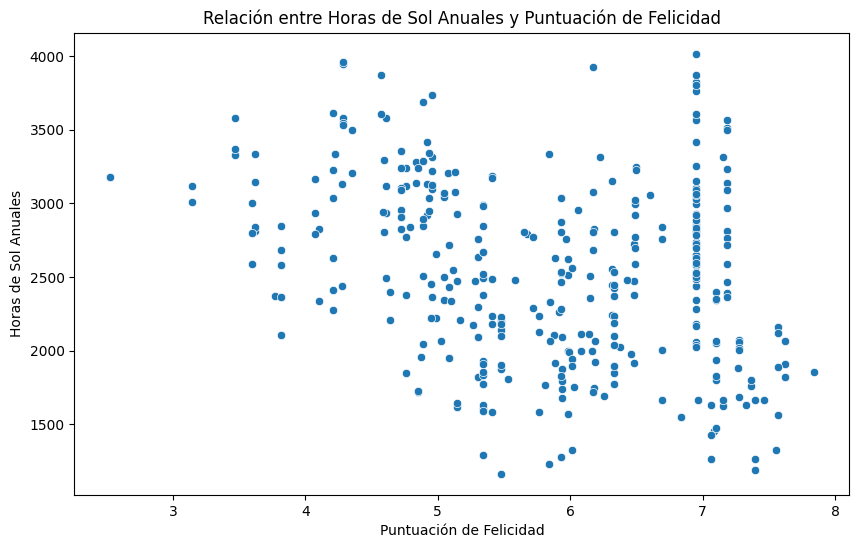

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ladder score', y='Year', data=combined_data)
plt.title('Relación entre Horas de Sol Anuales y Puntuación de Felicidad')
plt.xlabel('Puntuación de Felicidad')
plt.ylabel('Horas de Sol Anuales')
plt.show()


Como podemos observar este gráfico no nos dice demasiada información acerca de la correlación entre sol y felicidad, por lo que procedemos a hacer un ranking de los 19 países con más sol y los 19 países con mayor "indice de felicidad" según nuestro DataSet "Happiness Index Report".

In [48]:
# Ranking de felicidad
# Ordenamos el dataframe por la columna 'Ladder score' de manera descendente y luego tomamos los primeros 20 países
happiness_ranking = happiness_index[['Country name', 'Ladder score']].sort_values(by='Ladder score', ascending=False).head(20)
happiness_ranking['Happiness Rank'] = range(1, len(happiness_ranking) + 1)

A continuación hacems un ranking del TOP 19 de países "más felices de Europa"

In [35]:
# Mostramos el ranking de felicidad
print("Top 20 países más felices:")
print(happiness_ranking)

Top 20 países más felices:
      Country name  Ladder score  Happiness Rank
0          FINLAND         7.842               1
1          DENMARK         7.620               2
2      SWITZERLAND         7.571               3
3          ICELAND         7.554               4
4      NETHERLANDS         7.464               5
5           NORWAY         7.392               6
6           SWEDEN         7.363               7
7       LUXEMBOURG         7.324               8
8      NEW ZEALAND         7.277               9
9          AUSTRIA         7.268              10
10       AUSTRALIA         7.183              11
11          ISRAEL         7.157              12
12         GERMANY         7.155              13
13          CANADA         7.103              14
14         IRELAND         7.085              15
15      COSTA RICA         7.069              16
16  UNITED KINGDOM         7.064              17
17  CZECH REPUBLIC         6.965              18
18   UNITED STATES         6.951          

Procedemos a hacer un top 20 de los países con más horas de sol:

In [47]:
# Agrupamos por 'Country', calculamos la media de 'Year', ordenamos y tomamos los primeros 20
sunshine_ranking = sunshine_data.groupby('Country')['Year'].mean().sort_values(ascending=False).head(20).reset_index()
sunshine_ranking['Sunshine Rank'] = range(1, len(sunshine_ranking) + 1)

# Mostrar el ranking de horas de sol
sunshine_ranking


,Country,Year,Sunshine Rank
0,Namibia,3737.500000,1
1,Egypt,3710.680000,2
2,Sudan,3559.550000,3
3,United ArabEmirates,3508.700000,4
4,Oman,3493.300000,5
5,Botswana,3426.666667,6
6,Eritrea,3361.000000,7
7,Chad,3353.200000,8
8,Mauritania,3332.500000,9
9,Cyprus,3314.100000,10


Hemos observado, que al comparar los dos rankings, el top 20 de países con el índice de sol más alto no coincide claramente con el top 20 de países más felices. No obstante, procedamos a crear un gráfico de dispersión más simplificado en el que solo consideremos estos mismos 20 países en ambos conjuntos de datos

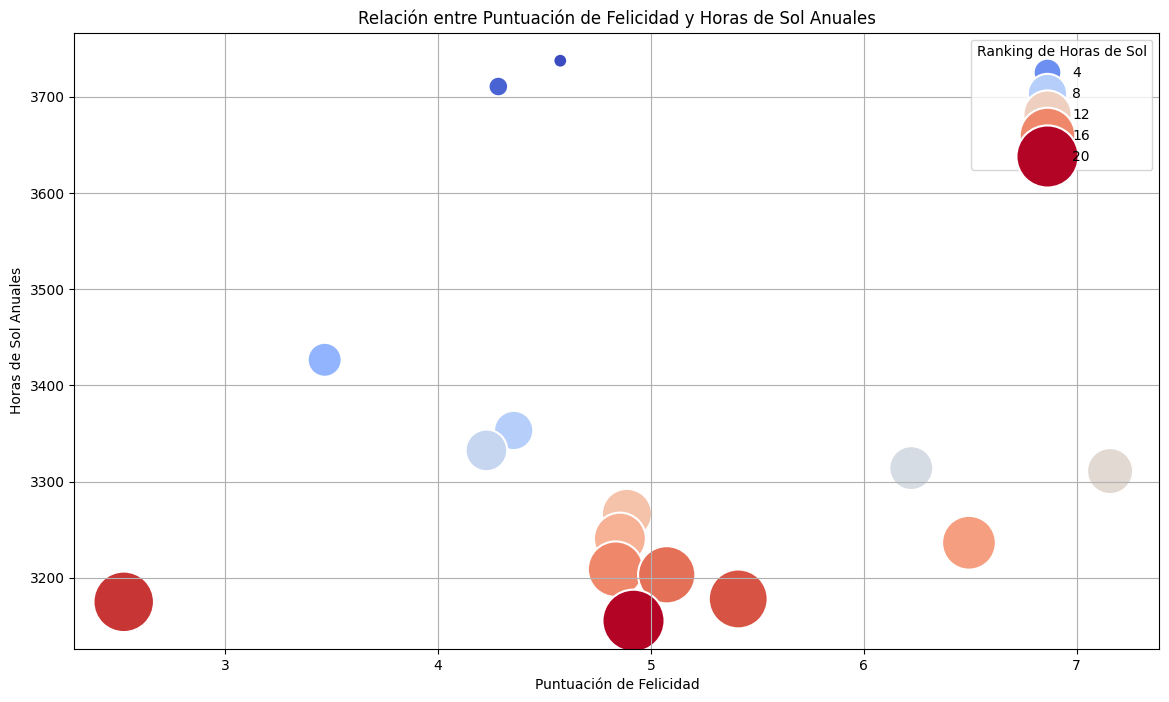

In [45]:

# Calculo del promedio de horas de sol anuales por país y crea un ranking de sol
sunshine_ranking = (
    sunshine_data.groupby('Country')['Year']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sunshine_ranking['Sunshine Rank'] = sunshine_ranking.index + 1

# Cruzamos los dos conjuntos de datos
combined_data = pd.merge(
    sunshine_ranking.head(20),  # Los 20 países con más horas de sol
    happiness_index,
    left_on='Country',
    right_on='Country name',
    how='inner'
)

# Creación de un gráfico de dispersión para visualizar la relación entre la puntuación de felicidad y las horas de sol
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=combined_data,
    x='Ladder score',
    y='Year',
    size='Sunshine Rank',
    hue='Sunshine Rank',
    sizes=(100, 2000),
    palette='coolwarm'
)
plt.title('Relación entre Puntuación de Felicidad y Horas de Sol Anuales')
plt.xlabel('Puntuación de Felicidad')
plt.ylabel('Horas de Sol Anuales')
plt.legend(title='Ranking de Horas de Sol')
plt.grid(True)
plt.show()


Parece que sigue sin haber una clara corelación entre ámbos factores.

Vamos a explorar la posibilidad de encontrar una correlación entre factores económicos, como el Producto Interno Bruto (PIB) per cápita, y la puntuación de felicidad.

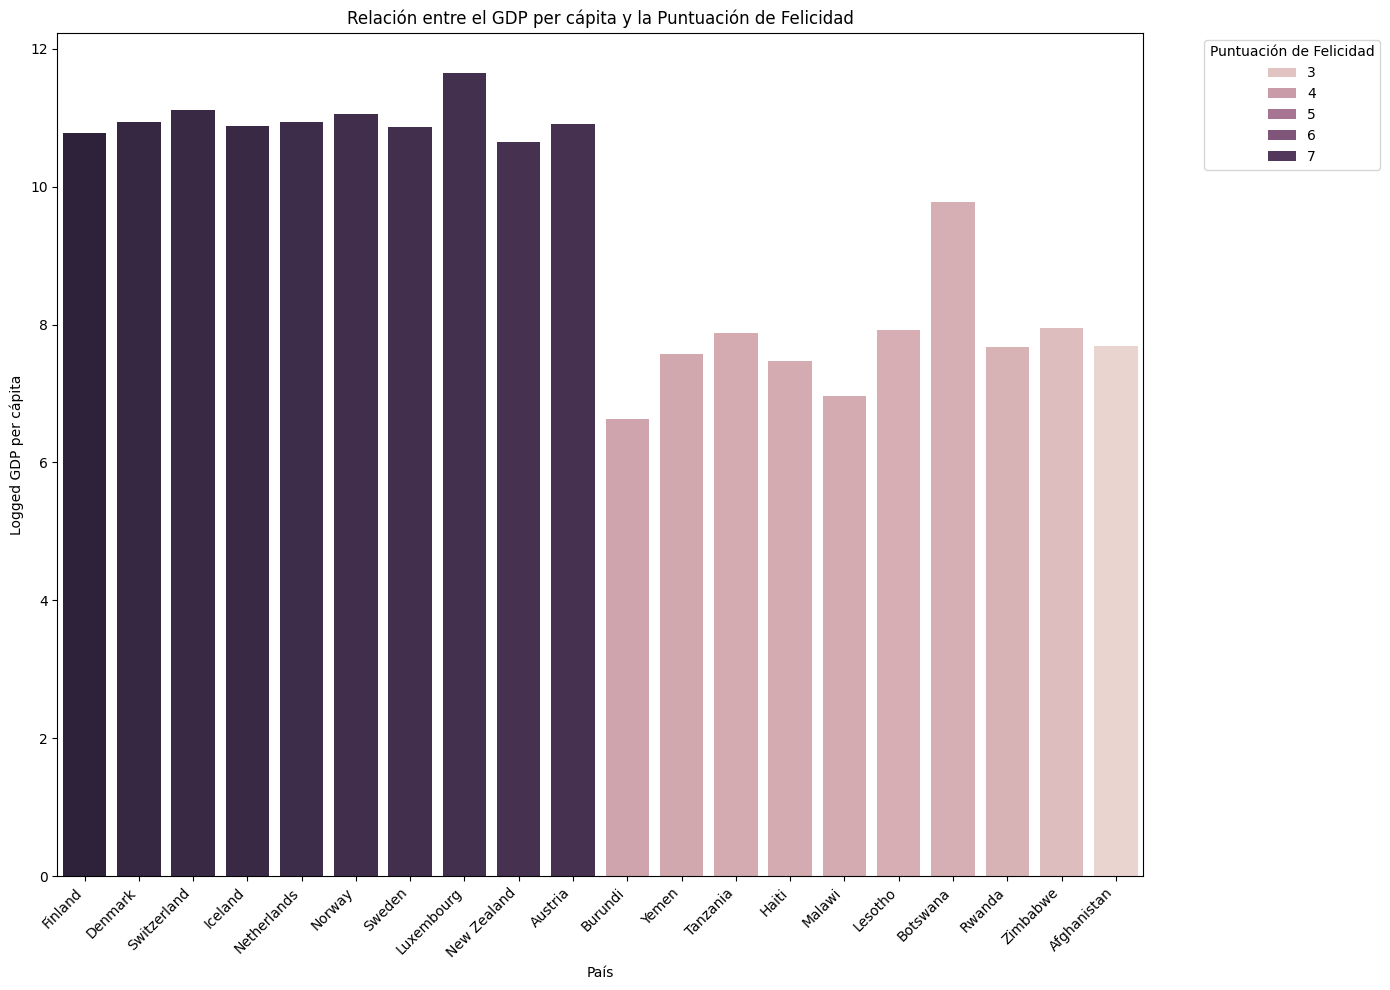

In [44]:
# Visualización: Gráfico de barras de la relación entre el dinero (GDP per cápita) y la felicidad
plt.figure(figsize=(14, 10))
barplot = sns.barplot(
    x='Country name', 
    y='Logged GDP per capita', 
    data=top_bottom_countries,
    hue='Ladder score',  # Color the bars by 'Ladder score'
    dodge=False
)
plt.title('Relación entre el GDP per cápita y la Puntuación de Felicidad')
plt.xlabel('País')
plt.ylabel('Logged GDP per cápita')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.legend(title='Puntuación de Felicidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the x labels
plt.show()


El coeficiente de Pearson, que se calcula en 0.7897596965098931, sugiere una fuerte correlación entre el PIB per cápita y la puntuación de felicidad. Sin embargo, es importante recordar que la correlación no implica necesariamente causalidad. 

Dado que demostrar la causalidad entre las horas de sol y la felicidad a simple vista no parece posible, aprovechemos el conjunto de datos para identificar cuáles son los 5 países con el PIB per cápita más alto y determinar cuáles de ellos tienen la mayor cantidad de horas de sol.

In [66]:

# 1. Obtención del top 5 de países más felices
top5_happiest_countries = happiness_data.nlargest(5, 'Ladder score')

# 2. Combinación los DataFrames por la columna 'Country name' en happiness_data y 'Country' en sunshine_data
combined_data = pd.merge(top5_happiest_countries, sunshine_data, left_on='Country name', right_on='Country', how='inner')

# 3. Calculo las horas de sol totales para cada país en el top 5
sunshine_columns = combined_data.columns[2:-1]  # Seleccionar las columnas de horas de sol
combined_data[sunshine_columns] = combined_data[sunshine_columns].apply(pd.to_numeric, errors='coerce')  # Convertir las columnas a números

# 4. Agrupación por país y calcular la suma de las horas de sol
grouped_data = combined_data.groupby('Country name')[sunshine_columns].sum()
grouped_data['Total Sunshine'] = grouped_data.sum(axis=1)

# Mostrar los resultados
print(grouped_data[['Total Sunshine']])



              Total Sunshine
Country name                
Denmark             6154.058
Finland             1976.596
Iceland             1446.354
Netherlands         1781.013
Switzerland         8211.780


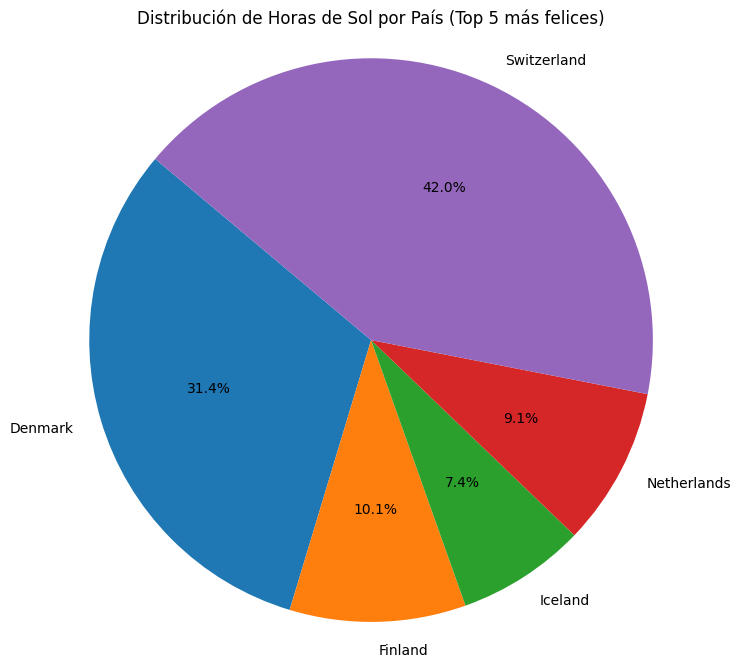

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Código anterior para cargar y procesar los datos)

# Crear el pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_data['Total Sunshine'], labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Horas de Sol por País (Top 5 más felices)')
plt.axis('equal')  # Aspecto igual para que el gráfico sea un círculo

# Mostrar el pie chart
plt.show()


El siguiente gráfico revela que Suiza, seguido por Dinamarca, es el país con el índice de felicidad más alto y, al mismo tiempo, disfruta de un mayor número de horas de sol. Estos hallazgos sugieren una correlación interesante entre la felicidad percibida y la exposición al sol en estos países. 

<div style="text-align: center; font-weight: bold; color: #FFFFFF; font-size: 24px;">Conclusiones</div>


A lo largo de nuestro análisis, hemos explorado la relación entre las horas de sol y la felicidad percibida en varios países. A pesar de nuestros esfuerzos, no hemos encontrado una correlación significativa entre estas dos variables. Sin embargo, hemos identificado un alto coeficiente de correlación entre el Producto Interno Bruto (PIB) per cápita y el índice de felicidad, lo que sugiere que la prosperidad económica puede estar relacionada con un mayor nivel de felicidad en la población.

Además, destacamos que Suiza se ha destacado como el país con el mayor número de "horas de sol" y el índice de felicidad más alto. Estos resultados pueden señalar indicios de la importancia de factores económicos en la percepción de la felicidad en una nación.

Es importante recordar que la correlación observada no implica necesariamente causalidad, y otros factores socioculturales y políticos pueden influir en el bienestar de una población. Este breve análisis nos proporciona una visión general, pero futuras investigaciones podrían profundizar en estas relaciones y considerar otros aspectos que influyen en la felicidad de las personas.